In [16]:
from skimage import io
import numpy as np
io.use_plugin('matplotlib')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from math import sin, cos, ceil, floor

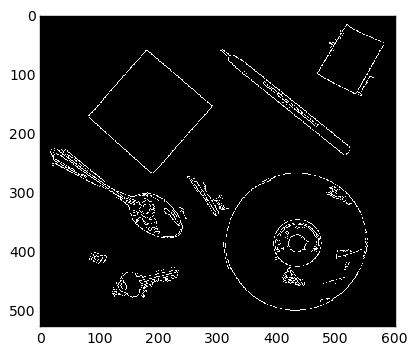

In [3]:
from scipy import ndimage, misc
image = ndimage.imread('./line1.png',0)
img = cv2.Canny(image,1,100)
io.imshow(img)

In [3]:
def houghmatrix(img, f_eta, R_eta, accuracy):
    f_max = np.pi
    R_max = int(np.sqrt(img.shape[0] ** 2 + img.shape[1] ** 2))
    hough_matrix = np.zeros((f_max / f_eta, R_max / R_eta))
    print R_max, f_max
    for i in tqdm(xrange(img.shape[0])):
        for j in xrange(img.shape[1]):
            if img[i][j] == 255:
                f = f_ind = 0
                for f_ind in xrange(hough_matrix.shape[0]):
                    R_lower = int(min(0, j * sin(f) + i * cos(f) - accuracy) / R_eta)
                    R_upper = int(max(R_max, j * sin(f) + i * cos(f) + accuracy) / R_eta)
                    hough_matrix[f_ind][R_lower:R_upper] += 1
                    f += f_eta
    return hough_matrix
    
    

In [13]:
a = np.linspace(0, np.pi, 180)

In [14]:
a.shape

(180,)

In [15]:
a

array([ 0.        ,  0.0175508 ,  0.03510159,  0.05265239,  0.07020319,
        0.08775398,  0.10530478,  0.12285558,  0.14040638,  0.15795717,
        0.17550797,  0.19305877,  0.21060956,  0.22816036,  0.24571116,
        0.26326195,  0.28081275,  0.29836355,  0.31591435,  0.33346514,
        0.35101594,  0.36856674,  0.38611753,  0.40366833,  0.42121913,
        0.43876992,  0.45632072,  0.47387152,  0.49142231,  0.50897311,
        0.52652391,  0.54407471,  0.5616255 ,  0.5791763 ,  0.5967271 ,
        0.61427789,  0.63182869,  0.64937949,  0.66693028,  0.68448108,
        0.70203188,  0.71958267,  0.73713347,  0.75468427,  0.77223507,
        0.78978586,  0.80733666,  0.82488746,  0.84243825,  0.85998905,
        0.87753985,  0.89509064,  0.91264144,  0.93019224,  0.94774304,
        0.96529383,  0.98284463,  1.00039543,  1.01794622,  1.03549702,
        1.05304782,  1.07059861,  1.08814941,  1.10570021,  1.123251  ,
        1.1408018 ,  1.1583526 ,  1.1759034 ,  1.19345419,  1.21

In [10]:
s = np.pi / 180
s

0.017453292519943295

In [20]:
R_max = np.sqrt(img.shape[0] ** 2 + img.shape[1] ** 2)
R = np.linspace(0, R_max, 1600)

In [38]:
a = np.ones((10, 10))

In [39]:
a

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [54]:
a[1:3]

array([[ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.]])

In [47]:
a

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [71]:
def houghlines(img, f_eta, R_eta, accuracy):
    f_max = np.pi
    R_max = np.sqrt(img.shape[0] ** 2 + img.shape[1] ** 2)
    R = np.linspace(0, R_max, R_eta)
    print R
    f = np.linspace(-np.pi / 2, np.pi / 2, f_eta)
    print f
    print f.shape
    hough_matrix = np.zeros((R_eta, f_eta))
    print hough_matrix.shape
    for i in tqdm(xrange(img.shape[0])):
        for j in xrange(img.shape[1]):
            if img[i][j] == 255:
                for f_ind in xrange(hough_matrix.shape[1]):
                    R_lower = int(max(0, j * sin(f[f_ind]) + i * cos(f[f_ind]) - accuracy))
                    #R_max / R_eta * x >= low
                    #x >= low * R_eta / R_max
                    x = int(floor(R_lower * R_eta / R_max))
                    R_upper = int(min(R_max, j * sin(f[f_ind]) + i * cos(f[f_ind]) + accuracy))
                    y = int(ceil(R_upper * R_eta / R_max))
                    hough_matrix[x:y, f_ind] += 1
    return hough_matrix, f, R

  3%|▎         | 17/526 [00:00<00:03, 161.45it/s]

[  0.00000000e+00   4.99952966e-01   9.99905933e-01 ...,   7.98424887e+02
   7.98924840e+02   7.99424793e+02]
[-1.57079633 -1.55324553 -1.53569473 -1.51814394 -1.50059314 -1.48304234
 -1.46549155 -1.44794075 -1.43038995 -1.41283915 -1.39528836 -1.37773756
 -1.36018676 -1.34263597 -1.32508517 -1.30753437 -1.28998358 -1.27243278
 -1.25488198 -1.23733118 -1.21978039 -1.20222959 -1.18467879 -1.167128
 -1.1495772  -1.1320264  -1.11447561 -1.09692481 -1.07937401 -1.06182322
 -1.04427242 -1.02672162 -1.00917082 -0.99162003 -0.97406923 -0.95651843
 -0.93896764 -0.92141684 -0.90386604 -0.88631525 -0.86876445 -0.85121365
 -0.83366286 -0.81611206 -0.79856126 -0.78101046 -0.76345967 -0.74590887
 -0.72835807 -0.71080728 -0.69325648 -0.67570568 -0.65815489 -0.64060409
 -0.62305329 -0.60550249 -0.5879517  -0.5704009  -0.5528501  -0.53529931
 -0.51774851 -0.50019771 -0.48264692 -0.46509612 -0.44754532 -0.42999453
 -0.41244373 -0.39489293 -0.37734213 -0.35979134 -0.34224054 -0.32468974
 -0.30713895 -0.

100%|██████████| 526/526 [00:22<00:00, 23.25it/s]


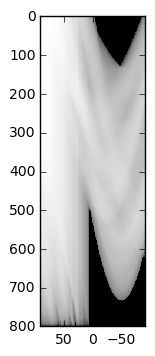

In [72]:
h, theta, d = houghlines(img, 180, 1600, 40)
io.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
                     d[-1], d[0]],
             cmap=plt.cm.gray, aspect=1/1.5)

In [64]:
h

array([[  121.,    76.,    29., ...,  8308.,  8305.,  8303.],
       [  121.,    76.,    29., ...,  8308.,  8305.,  8303.],
       [  121.,    76.,    29., ...,  8304.,  8301.,  8299.],
       ..., 
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

In [35]:
h.shape

(1600, 180)

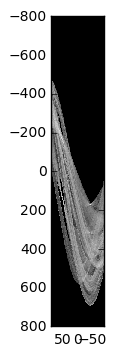

In [65]:
from skimage.transform import hough_line
h, theta, d = hough_line(img)
io.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
                     d[-1], d[0]],
             cmap=plt.cm.gray, aspect=1/1.5)

In [66]:
h

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint64)